<code>years_em</code> fueron completados con ceros

<code>years_demency</code> fueron completados con ceros

<code>tecar</code> reasignado con binario

<code>lateralidad</code> reasignado con binario: 1:diestro

<code>genero</code> reasignado con binario: 1:M 0:H

<code>tipico</code>, <code>tipico</code> y <code>deposito</code> han sido completadas con ceros en las casillas vacías (Entre los existentes ninguno tiene valor cero)

Paciente 10: variable <code>posee_dii</code> vacío. Se ha puesto 'NO'

Paciente 25: variables <code>forst_iden</code>,	<code>fcsrt_free_recall_score</code>,	<code>fcsrt_cued_recall_score</code> y	<code>fcsrt_total_recall_score</code> vacías. Se ha puesto 0


Variables han sido reescritas en minúscula y separadas con _


In [1]:
# Imports needed for the script
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
data_non = pd.read_csv("qvalues_pvalues_tests.csv", sep = ',') 

names = data_non.columns
#data_non.columns = [''] * len(data_non.columns)
data_non.shape
names

Index(['general_structure', 'sub_structure', 'hc_q1', 'hc_q2', 'hc_q3',
       'en_q1', 'en_q2', 'en_q3', 'ed_q1', 'ed_q2', 'ed_q3',
       'kruskal_wallis_hc_vs_en_ed_pvalue', 'mann_whitney_hc_vs_en_pvalue',
       'mann_whitney_hc_vs_ed_pvalue', 'mann_whitney_en_vs_ed_pvalue'],
      dtype='object')

In [3]:
data_non = data_non.fillna(0)

In [4]:
general_structures = data_non['general_structure'].drop_duplicates()
general_structures.values
data_non.shape
general_structures.values

array(['white_matter_segmentation', 'ventricles', 'thalamus',
       'segmentation', 'general_segmentation', 'hippocampus',
       'gray_matter_segmentation', 'cingulate', 'basal_ganglia',
       'amygdala'], dtype=object)

In [20]:
def define_mark(array,idx):
        if array[idx]<=0.05:
            mark = '*'
            significance = True
        else:
            mark = ''
            significance = False
        
        return significance,mark

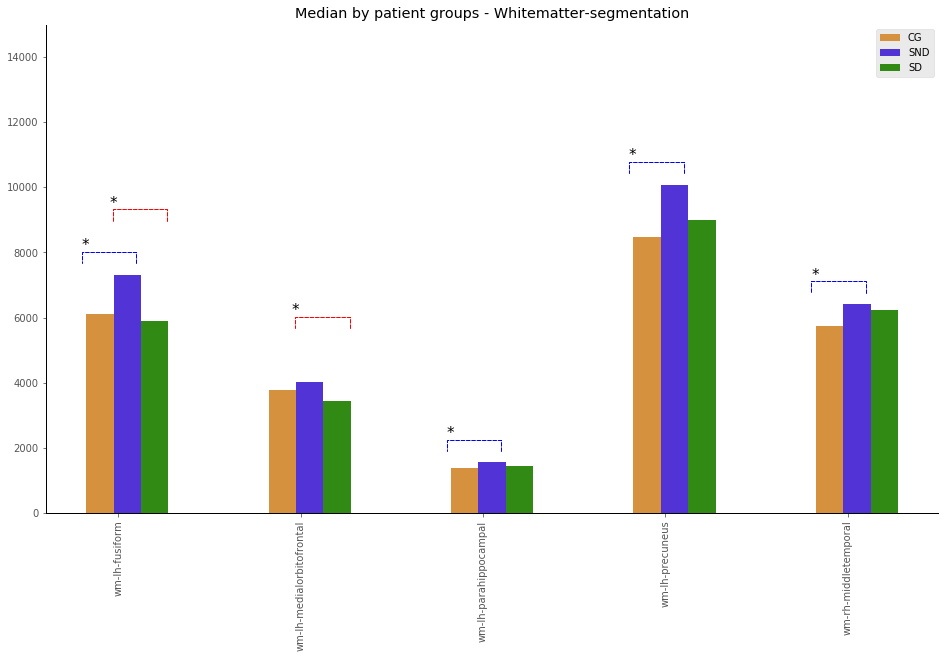

In [22]:
substructure_names = ['wm-lh-fusiform','wm-lh-medialorbitofrontal',
                      'wm-lh-parahippocampal','wm-lh-precuneus','wm-rh-middletemporal']
for general_structure in ['white_matter_segmentation']:
    general_structure_data = data_non[(data_non['general_structure']==general_structure)]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.loc[general_structure_data['sub_structure']
                                                        .isin(substructure_names)]
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots()
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - Whitematter-segmentation')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,15000])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 2500
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+750), zorder=10, size = 15)
        ax.annotate('', xy=(i,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        if significance:
            label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    #label_diff_1_3(0,1,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 1500
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+550), zorder=10, size=15)
        ax.annotate('', xy=(i+0.17,y_hc_en), xytext=(i+0.47,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        if significance:
            label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(0,1,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(1,2,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(2,3,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(3,4,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(4,5,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 200
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+550), zorder=10, size = 15)
        ax.annotate('', xy=(i,y_hc_en), xytext=(i+0.30,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        if significance:
            label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    #label_diff_1_2(0,1,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    fig.savefig('whitematter_segmentation_plot.pdf', dpi=fig.dpi, bbox_inches="tight")
    
    

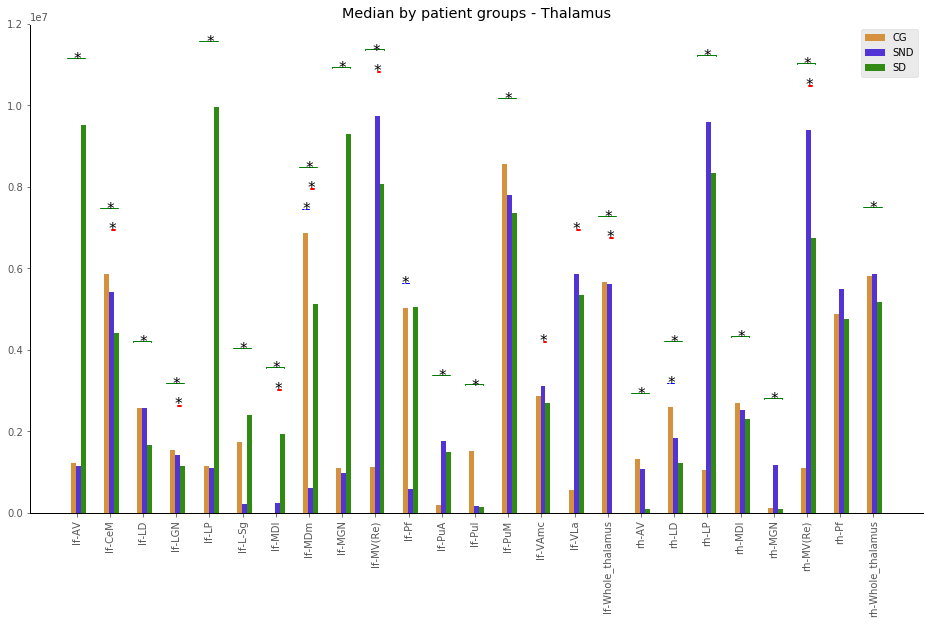

In [23]:
substructure_names = ['lf-AV','lf-CeM','lf-LD','lf-LGN','lf-LP','lf-L-Sg','lf-MDl','lf-MDm','lf-MGN','lf-MV(Re)',
                      'lf-Pf','lf-PuA','lf-PuI','lf-PuM','lf-VAmc','lf-VLa','lf-Whole_thalamus','rh-AV','rh-LD',
                      'rh-LP','rh-MDl','rh-MGN','rh-MV(Re)','rh-Pf','rh-Whole_thalamus']

#'lf-PuA','lf-L-Sg',
for general_structure in ['thalamus']:
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['thalamus'])]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[0,1,4,5,6,7,8,9,10,11,13,15,16,18,
                                                          20,21,25,26,30,32,34,36,37,39,51]]
    general_structure_data = pd.DataFrame(general_structure_data)#.transpose()
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots()
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - Thalamus')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,1.2e7])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    
    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 1500000
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+1750), zorder=10, size = 15)
        ax.annotate('', xy=(i-0.10,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        if significance:
            label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    #label_diff_1_3(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 1000000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':2, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+550), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.15,y_hc_en), xytext=(i+0.47,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        if significance:
            label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
    #label_diff_2_3(0,1,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(1,2,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(2,3,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(3,4,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(4,5,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 500000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+550), zorder=10, size = 15)
        ax.annotate('', xy=(i-0.10,y_hc_en), xytext=(i+0.30,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        if significance:
            label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    #label_diff_1_2(0,1,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    fig.savefig('thalamus_plot.pdf', dpi=fig.dpi, bbox_inches="tight")
    
    

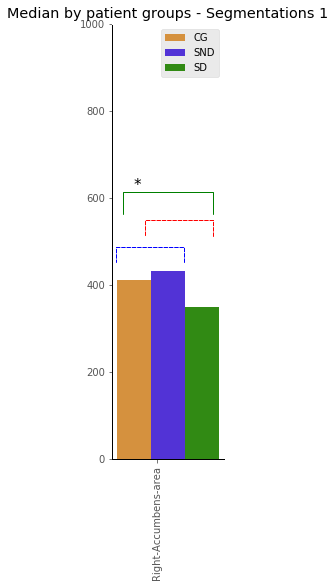

In [8]:
substructure_names = ['Right-Accumbens-area']#'CC_Mid_Anterior']
#'lf-PuA','lf-L-Sg',
for general_structure in ['segmentation']:
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['general_segmentation','segmentation'])]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[1]]
    general_structure_data = pd.DataFrame(general_structure_data)#.transpose()
    #print(general_structure_data)
    #general_structure_data = np.array(data_non.columns.tolist())
    #general_structure_data = np.append([general_structure_data], [data_non[(data_non['general_structure']==general_structure)]\
    #                                         .to_numpy()[1]],axis=0)
    
    
    #general_structure_data = pd.DataFrame(general_structure_data)#, columns = np.array(data_non.columns.tolist()))
    #print(general_structure_data.iloc[1])
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    #general_structure_data = general_structure_data[(general_structure_data\
     #                                                ['general_structure']=="Right-Accumbens-area")]
    
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize = (2,8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - Segmentations 1')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,1000])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 120
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+68), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.05,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        if significance:
            label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 70
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+18), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.15,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    
    
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        if significance:
            label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
   
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 10
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+18), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.32,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        significance,mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        if significance:
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    
    fig.savefig('segmentation_plot.pdf', dpi=fig.dpi, bbox_inches="tight")
    
    

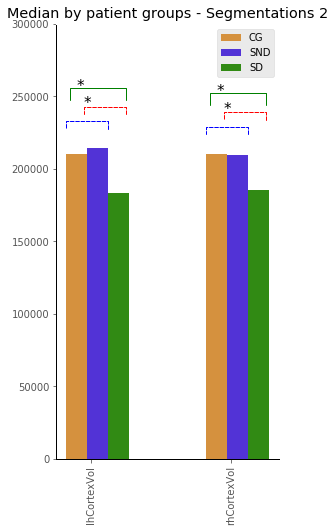

In [9]:
substructure_names = ['lhCortexVol','rhCortexVol']#'CC_Mid_Anterior']
#'lf-PuA','lf-L-Sg',
for general_structure in ['segmentation']:
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['general_segmentation','segmentation'])]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[2,3]]
    general_structure_data = pd.DataFrame(general_structure_data)#.transpose()
    #print(general_structure_data)
    #general_structure_data = np.array(data_non.columns.tolist())
    #general_structure_data = np.append([general_structure_data], [data_non[(data_non['general_structure']==general_structure)]\
    #                                         .to_numpy()[1]],axis=0)
    
    
    #general_structure_data = pd.DataFrame(general_structure_data)#, columns = np.array(data_non.columns.tolist()))
    #print(general_structure_data.iloc[1])
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    #general_structure_data = general_structure_data[(general_structure_data\
     #                                                ['general_structure']=="Right-Accumbens-area")]
    
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize = (4,8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - Segmentations 2')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,300000])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 30000
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+10000), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.05,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 20000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+8000), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.15,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
   
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 10000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+8000), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.32,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    
    fig.savefig('segmentation_2_plot.pdf', dpi=fig.dpi, bbox_inches="tight")
    
    

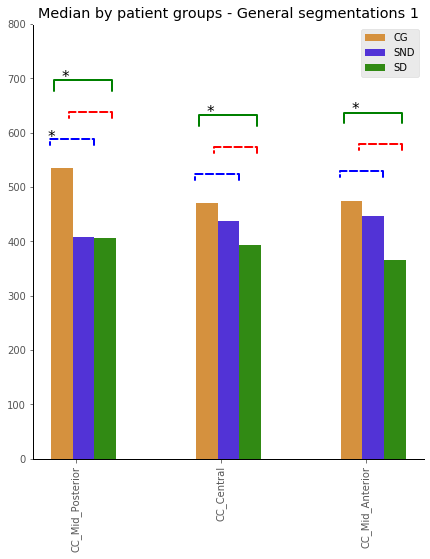

In [10]:
substructure_names = ['CC_Mid_Posterior','CC_Central','CC_Mid_Anterior']
#'lf-PuA','lf-L-Sg',
for general_structure in ['general_segmentation']:
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['general_segmentation'])]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[1,2,3]]
    general_structure_data = pd.DataFrame(general_structure_data)#.transpose()
    #print(general_structure_data)
    #general_structure_data = np.array(data_non.columns.tolist())
    #general_structure_data = np.append([general_structure_data], [data_non[(data_non['general_structure']==general_structure)]\
    #                                         .to_numpy()[1]],axis=0)
    
    
    #general_structure_data = pd.DataFrame(general_structure_data)#, columns = np.array(data_non.columns.tolist()))
    #print(general_structure_data.iloc[1])
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    #general_structure_data = general_structure_data[(general_structure_data\
     #                                                ['general_structure']=="Right-Accumbens-area")]
    
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize = (7,8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - General segmentations 1')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,800])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 130
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':7,'shrinkB':7,'linewidth':2, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+30), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.05,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 80
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':7,'shrinkB':7,'linewidth':2, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+20), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.15,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
   
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 30
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':7,'shrinkB':7,'linewidth':2, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+20), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.32,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    fig.savefig('general_segmentation_plot.pdf', dpi=fig.dpi, bbox_inches="tight")
    
    

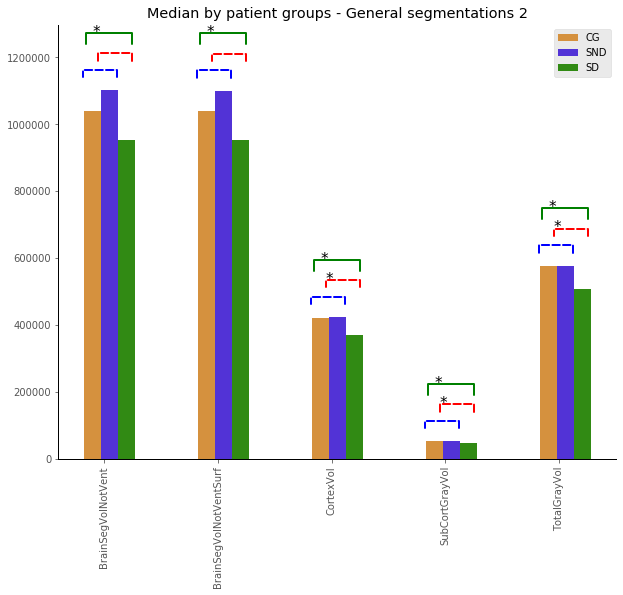

In [11]:
substructure_names = ['BrainSegVolNotVent',
                      'BrainSegVolNotVentSurf','CortexVol','SubCortGrayVol','TotalGrayVol']
#'lf-PuA','lf-L-Sg',
for general_structure in ['general_segmentation']:
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['general_segmentation'])]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[6,7,8,10,11]]
    general_structure_data = pd.DataFrame(general_structure_data)#.transpose()
    #print(general_structure_data)
    #general_structure_data = np.array(data_non.columns.tolist())
    #general_structure_data = np.append([general_structure_data], [data_non[(data_non['general_structure']==general_structure)]\
    #                                         .to_numpy()[1]],axis=0)
    
    
    #general_structure_data = pd.DataFrame(general_structure_data)#, columns = np.array(data_non.columns.tolist()))
    #print(general_structure_data.iloc[1])
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    #general_structure_data = general_structure_data[(general_structure_data\
     #                                                ['general_structure']=="Right-Accumbens-area")]
    
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize = (10,8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - General segmentations 2')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,1300000])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 130000
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':3,'shrinkB':3,'linewidth':2, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+30000), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.05,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 80000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':3,'shrinkB':3,'linewidth':2, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+20000), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.15,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
   
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 30000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':3,'shrinkB':3,'linewidth':2, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+20000), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.32,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    fig.savefig('general_segmentation_2_plot.pdf', dpi=fig.dpi, bbox_inches="tight")
    
    

*


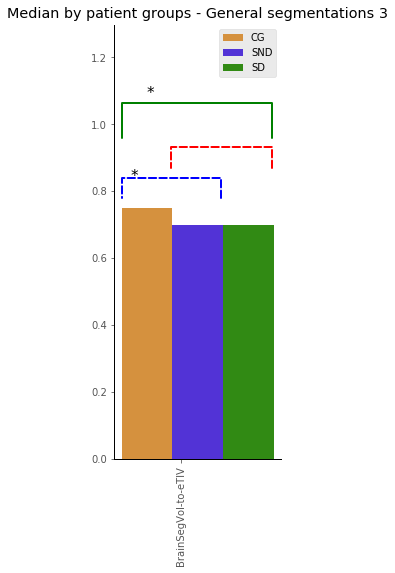

In [12]:
substructure_names = ['BrainSegVol-to-eTIV']
#'lf-PuA','lf-L-Sg',
for general_structure in ['general_segmentation']:
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['general_segmentation'])]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[14]]
    general_structure_data = pd.DataFrame(general_structure_data)#.transpose()
    #print(general_structure_data)
    #general_structure_data = np.array(data_non.columns.tolist())
    #general_structure_data = np.append([general_structure_data], [data_non[(data_non['general_structure']==general_structure)]\
    #                                         .to_numpy()[1]],axis=0)
    
    
    #general_structure_data = pd.DataFrame(general_structure_data)#, columns = np.array(data_non.columns.tolist()))
    #print(general_structure_data.iloc[1])
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    #general_structure_data = general_structure_data[(general_structure_data\
     #                                                ['general_structure']=="Right-Accumbens-area")]
    
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize = (3,8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - General segmentations 3')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,1.3])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 0.18
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':10,'shrinkB':10,'linewidth':2, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+0.15), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.025,y_hc_en), xytext=(i+0.47,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 0.09
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':10,'shrinkB':10,'linewidth':2, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+0.2), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.17,y_hc_en), xytext=(i+0.47,y_hc_en), arrowprops=props)

    # Call the function
    
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
   
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 0
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':10,'shrinkB':10,'linewidth':2, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        print(text)
        ax.annotate(text, xy=(i+0.05,y_hc_en+0.08), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.025,y_hc_en), xytext=(i+0.32,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    fig.savefig('general_segmentation_3_plot.pdf', dpi=fig.dpi, bbox_inches="tight")
    
    

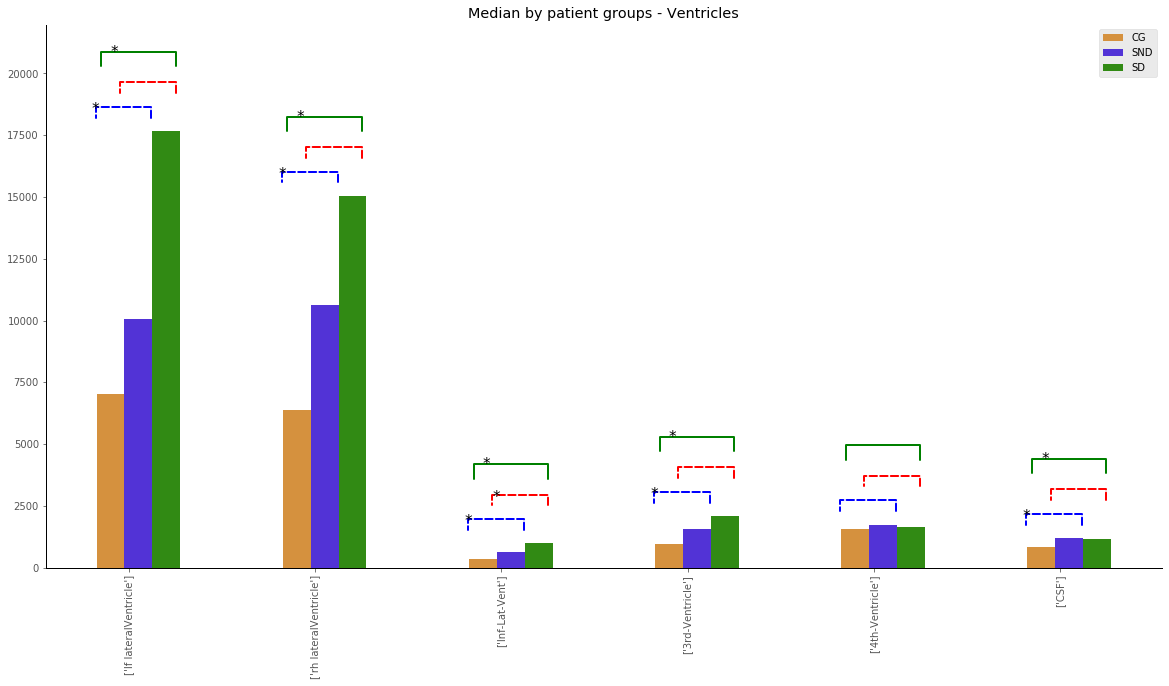

In [13]:
substructure_names = ['CC_Mid_Posterior','CC_Central','CC_Mid_Anterior','BrainSegVolNotVent',
                      'BrainSegVolNotVentSurf','CortexVol','SubCortGrayVol','TotalGrayVol','BrainSegVol-to-eTIV']
#'lf-PuA','lf-L-Sg',
for general_structure in ['ventricles']:
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['ventricles'])]
    
    substructure_names = general_structure_data[['sub_structure']].values
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    #general_structure_data = general_structure_data.iloc[[1,2,3,6,7,8,10,11,14]]
    #general_structure_data = pd.DataFrame(general_structure_data)#.transpose()
    #print(general_structure_data)
    #general_structure_data = np.array(data_non.columns.tolist())
    #general_structure_data = np.append([general_structure_data], [data_non[(data_non['general_structure']==general_structure)]\
    #                                         .to_numpy()[1]],axis=0)
    
    
    #general_structure_data = pd.DataFrame(general_structure_data)#, columns = np.array(data_non.columns.tolist()))
    #print(general_structure_data.iloc[1])
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    #general_structure_data = general_structure_data[(general_structure_data\
     #                                                ['general_structure']=="Right-Accumbens-area")]
    
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize = (20,10))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - Ventricles')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,2.2e4])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 2300
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':8,'shrinkB':8,'linewidth':2, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+700), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.05,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 1300
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':6,'shrinkB':6,'linewidth':2, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+400), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.15,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
   
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 300
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':6,'shrinkB':6,'linewidth':2, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+400), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.32,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    fig.savefig('ventricles_plot.pdf', dpi=fig.dpi, bbox_inches="tight")
    
    

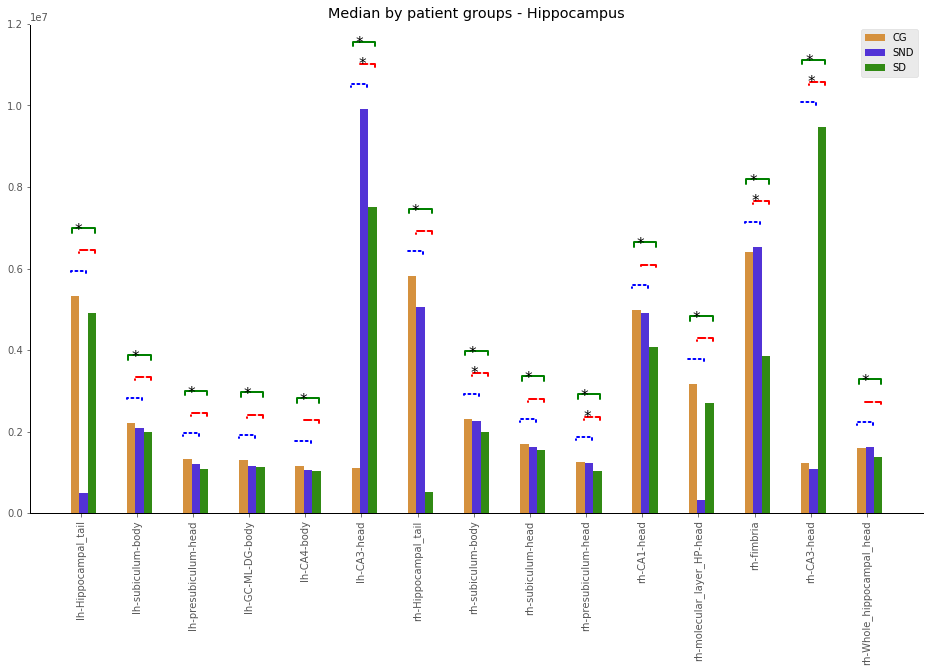

In [14]:
substructure_names = ['lh-Hippocampal_tail','lh-subiculum-body','lh-presubiculum-head','lh-GC-ML-DG-body',
                      'lh-CA4-body','lh-CA3-head','rh-Hippocampal_tail','rh-subiculum-body','rh-subiculum-head',
                      'rh-presubiculum-head','rh-CA1-head','rh-molecular_layer_HP-head','rh-fimbria','rh-CA3-head',
                      'rh-Whole_hippocampal_head']
#'lf-PuA','lf-L-Sg',
for general_structure in ['hippocampus']:
    #general_structure_data = data_non[(data_non['general_structure']==general_structure)]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.loc[general_structure_data['sub_structure']
                                                        .isin(substructure_names)]
    
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['hippocampus'])]
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[0,1,5,13,15,17,22,23,25,27,28,31,38,39,42]]
    general_structure_data = pd.DataFrame(general_structure_data)
    
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots()
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - Hippocampus')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,1.2e7])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 1500000
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':2,'shrinkB':2,'linewidth':2, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+1750), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.05,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    #label_diff_1_3(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 1000000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':2,'shrinkB':2,'linewidth':2, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+550), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.17,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
    #label_diff_2_3(0,1,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(1,2,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(2,3,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(3,4,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(4,5,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 500000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':':','shrinkA':2,'shrinkB':2,'linewidth':2, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+550), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.30,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    #label_diff_1_2(0,1,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    fig.savefig('hippocampus_plot.pdf', dpi=fig.dpi, bbox_inches="tight")

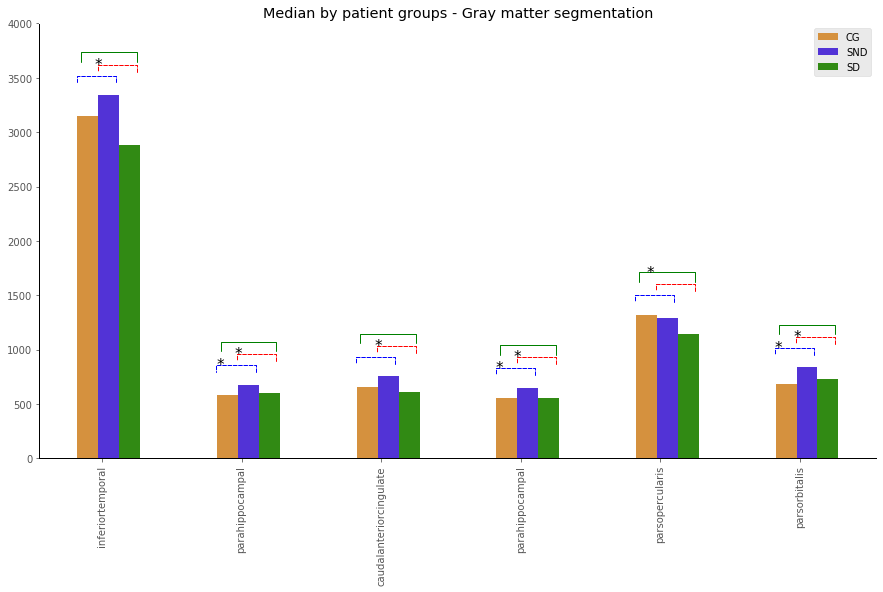

In [15]:
substructure_names = ['inferiortemporal','parahippocampal','caudalanteriorcingulate',
                      'parahippocampal','parsopercularis','parsorbitalis']
#'lf-PuA','lf-L-Sg',
for general_structure in ['gray_matter_segmentation']:
    #general_structure_data = data_non[(data_non['general_structure']==general_structure)]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    
    #general_structure_data = general_structure_data.loc[general_structure_data['sub_structure']
    #                                                    .isin(substructure_names)]
    
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['gray_matter_segmentation'])]
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[8,15,37,50,52,53]]
    general_structure_data = pd.DataFrame(general_structure_data)
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
        
    ax.set_title('Median by patient groups - Gray matter segmentation')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,4000])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    
    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 240
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':7,'shrinkB':7,'linewidth':1, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+100), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.05,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    #label_diff_1_3(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 170
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+70), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.17,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
    #label_diff_2_3(0,1,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(1,2,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(2,3,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(3,4,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(4,5,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 70
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.02,y_hc_en+70), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.30,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    #label_diff_1_2(0,1,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    fig.savefig('graymatter_segmentation_plot.pdf', dpi=fig.dpi, bbox_inches="tight")

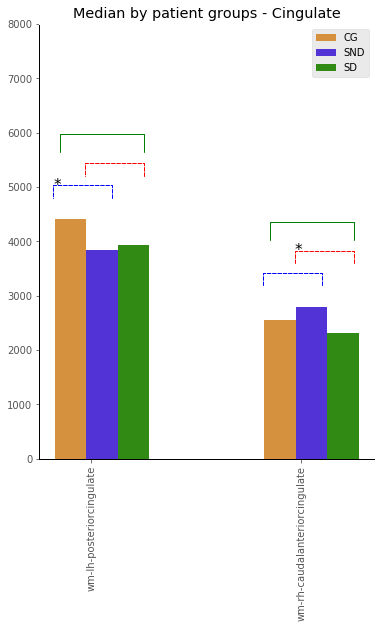

In [16]:
substructure_names = ['wm-lh-posteriorcingulate','wm-rh-caudalanteriorcingulate']



#substructure_names = ['parahippocampal','parsopercularis']
#'lf-PuA','lf-L-Sg',
for general_structure in ['cingulate']:
    #general_structure_data = data_non[(data_non['general_structure']==general_structure)]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    
    #general_structure_data = general_structure_data.loc[general_structure_data['sub_structure']
     #                                                   .isin(substructure_names)]
    
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['cingulate'])]
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[2,4]]
    general_structure_data = pd.DataFrame(general_structure_data)
    
    
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize=(6, 8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % int(height), ha='center', va='bottom')
        
    ax.set_title('Median by patient groups - Cingulate')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,8000])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()

    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 1100
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':7,'shrinkB':7,'linewidth':1, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+500), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.05,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    #label_diff_1_3(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 700
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.17,y_hc_en+250), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.17,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
    #label_diff_2_3(0,1,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(1,2,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(2,3,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(3,4,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(4,5,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 300
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.02,y_hc_en+250), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.30,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    #label_diff_1_2(0,1,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    fig.savefig('cingulate_plot.pdf', dpi=fig.dpi, bbox_inches="tight")

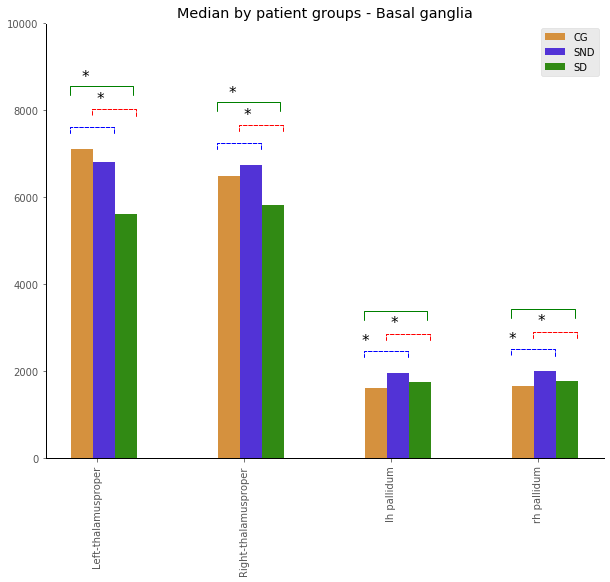

In [17]:
substructure_names = ['Left-thalamusproper','Right-thalamusproper','lh pallidum','rh pallidum']
#'lf-PuA','lf-L-Sg',
for general_structure in ['basal_ganglia']:
    #general_structure_data = data_non[(data_non['general_structure']==general_structure)]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    
    general_structure_data = general_structure_data.loc[general_structure_data['sub_structure']
                                                        .isin(substructure_names)]
    
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['basal_ganglia'])]
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[0,1,6,7]]
    general_structure_data = pd.DataFrame(general_structure_data)
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - Basal ganglia')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
    
    #print(len(ax.bar))
    
    ax.set_ylim([0,10000])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
    
    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 1000
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':10,'shrinkB':10,'linewidth':1, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.10,y_hc_en+550), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    #label_diff_1_3(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_3(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 600
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':7,'shrinkB':7,'linewidth':1, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.20,y_hc_en+450), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.17,y_hc_en), xytext=(i+0.47,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
    #label_diff_2_3(0,1,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(1,2,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(2,3,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(3,4,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_2_3(4,5,'p='+str('%.3f'%(mann_whitney_en_vs_ed_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 200
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':7,'shrinkB':7,'linewidth':1, 'color':'blue'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+450), zorder=10, size = 15)
        ax.annotate('', xy=(i+0.02,y_hc_en), xytext=(i+0.32,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    #label_diff_1_2(0,1,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[0])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(1,2,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[1])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(2,3,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[2])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(3,4,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[3])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    #label_diff_1_2(4,5,'p='+str('%.3f'%(mann_whitney_hc_vs_en_pvalue[4])),ind,q2_hc.values,q2_en.values,q2_ed.values)
    fig.savefig('basal_ganglia_plot.pdf', dpi=fig.dpi, bbox_inches="tight")

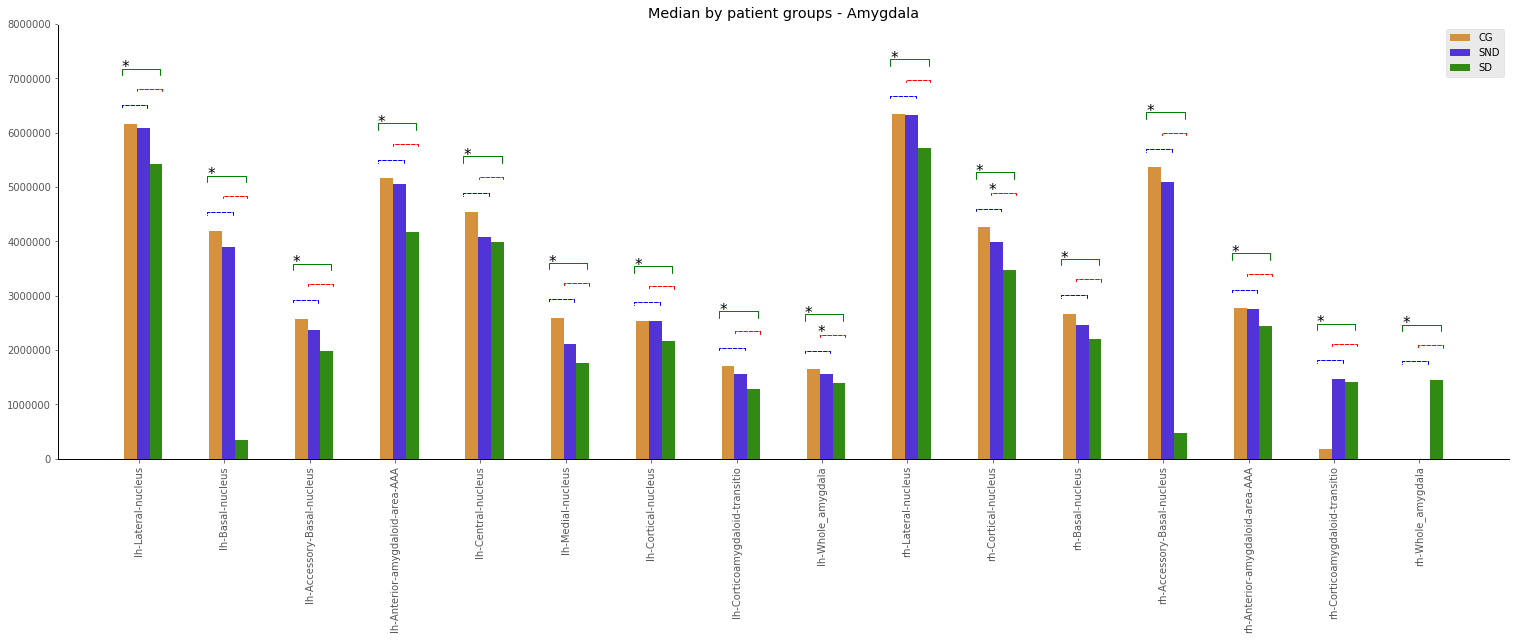

In [18]:
substructure_names = ['lh-Lateral-nucleus','lh-Basal-nucleus','lh-Accessory-Basal-nucleus',
                      'lh-Anterior-amygdaloid-area-AAA','lh-Central-nucleus',
                      'lh-Medial-nucleus','lh-Cortical-nucleus','lh-Corticoamygdaloid-transitio',
                      'lh-Whole_amygdala','rh-Lateral-nucleus','rh-Cortical-nucleus',
                      'rh-Basal-nucleus','rh-Accessory-Basal-nucleus','rh-Anterior-amygdaloid-area-AAA',
                      'rh-Corticoamygdaloid-transitio',
                      'rh-Whole_amygdala']
#'lf-PuA','lf-L-Sg',
for general_structure in ['amygdala']:
    #general_structure_data = data_non[(data_non['general_structure']==general_structure)]
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    
    general_structure_data = general_structure_data.loc[general_structure_data['sub_structure']
                                                        .isin(substructure_names)]
    
    
    general_structure_data = data_non.loc[data_non['general_structure']
                                                        .isin(['amygdala'])]
    
    #general_structure_data_f = general_structure_data.loc[substructure_names] 
    
    general_structure_data = general_structure_data.iloc[[0,1,2,3,4,5,6,7,9,10,11,12,13,16,17,19]]
    general_structure_data = pd.DataFrame(general_structure_data)
    
    q2_hc = general_structure_data['hc_q2']
    q2_en = general_structure_data['en_q2']
    q2_ed = general_structure_data['ed_q2']
    mann_whitney_hc_vs_en_pvalue = general_structure_data['mann_whitney_hc_vs_en_pvalue'].values
    mann_whitney_hc_vs_ed_pvalue = general_structure_data['mann_whitney_hc_vs_ed_pvalue'].values
    mann_whitney_en_vs_ed_pvalue = general_structure_data['mann_whitney_en_vs_ed_pvalue'].values
    
    fig, ax = plt.subplots(figsize=(26, 8))#figsize=(6, 8))
    
    ind = np.arange(len(substructure_names))    # the x locations for the groups
    
    margin = 0.1
    width = 0.15         # the width of the bars
    bar1 = ax.bar(margin + ind, q2_hc, width,  label='CG', color = '#d5913e')
    bar2 = ax.bar(margin + ind + width, q2_en, width, label='SND', color = '#5233d6')
    bar3 = ax.bar(margin + ind + 2*width, q2_ed, width, label='SD', color = '#318a14')
        
    for rect in bar1 + bar2 + bar3:
        height = rect.get_height()
        #plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    
    ax.set_title('Median by patient groups - Amygdala')
    ax.set_xticks(ind + margin + 2*width / 3)
    ax.set_xticklabels(substructure_names, rotation=90)
  
    
    ax.set_ylim([0,8e6])
    #ax.grid(False)
    ax.set_facecolor('xkcd:white')
    ax.spines['bottom'].set_color('black')
    #ax.spines['top'].set_color('#dddddd') 
    #ax.spines['right'].set_color('red')
    ax.spines['left'].set_color('black')
    
    ax.legend()
   
    
    def label_diff_1_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 800000
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'green'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i,y_hc_en+150000), zorder=10, size=15)
        ax.annotate('', xy=(i,y_hc_en), xytext=(i+0.45,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_ed_pvalue,idx)
        label_diff_1_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
    
    def label_diff_2_3(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 500000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'red'}
        #ax.annotate(text, xy=(X[i],y+7), zorder=10)
        #ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
        ax.annotate(text, xy=(i+0.15,y_hc_en+100000), zorder=10, size=15)
        ax.annotate('', xy=(i+0.18,y_hc_en), xytext=(i+0.47,y_hc_en), arrowprops=props)

    # Call the function
    #label_diff(0,1,'p=0.0370',ind,q2_hc)
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_en_vs_ed_pvalue,idx)
        label_diff_2_3(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
        
   
    
    
    def label_diff_1_2(i,j,text,X,group1,group2,group3):
        #x = (X[i]+X[j])/2
        pos_max = max(group1[i], group2[i], group3[i])
        y_hc_en = pos_max + 200000
        y_hc_ed = 1.2* pos_max
        y_ed_en = 1.3* pos_max
        #dx = abs(X[i]-X[j])

        props = {'connectionstyle':'bar','arrowstyle':'-',\
                     'linestyle':'--','shrinkA':5,'shrinkB':5,'linewidth':1, 'color':'blue'}
        ax.annotate(text, xy=(i,y_hc_en+100000), zorder=10, size=15)
        ax.annotate('', xy=(i,y_hc_en), xytext=(i+0.30,y_hc_en), arrowprops=props)

    # Call the function
    
    for idx in range (0,len(substructure_names)):
        mark = define_mark(mann_whitney_hc_vs_en_pvalue,idx)
        label_diff_1_2(idx,1,mark,ind,q2_hc.values,q2_en.values,q2_ed.values)
        
    fig.savefig('amygdala_plot.pdf', dpi=fig.dpi, bbox_inches="tight")